### Compute SNR and CNR to gauge image quality in medical phantom analysis.
#### SNR compares signal strength to background noise, CNR assesses tissue contrast against background.
### Accurate region identification (e.g., light for tissue, dark within tissue, noisy ROI for backgtround) is crucial for CNR evaluation.


Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/200 mT_116 ms_slice_1.tif
SNR: 44.62138417112609, CNR: -14.525151796873661
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_200mT.tiff
SNR: 1.198469641726407, CNR: -0.2170843848650019
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/200 mT_116 ms_slice_1.tif
SNR: 38.47638702392578, CNR: -4.27163028717041


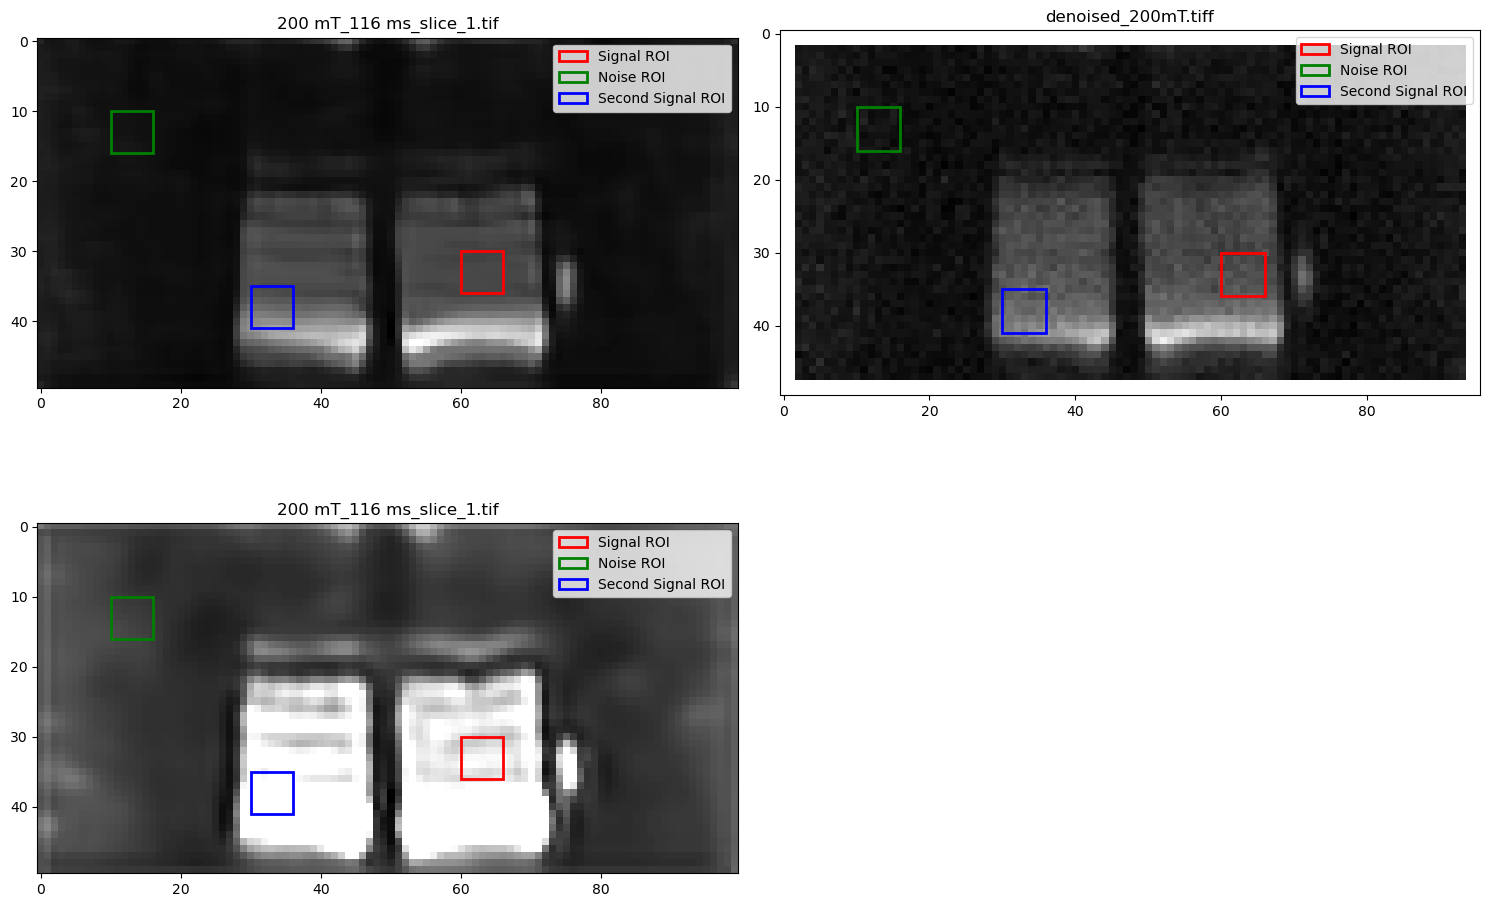

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR .
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()


image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/200 mT_116 ms_slice_1.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_200mT.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/200 mT_116 ms_slice_1.tif']
    


roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)



Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/20 mT_123 ms_slice_1.tif
SNR: 38.865563662900236, CNR: -7.5498487236321665
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_20mTML.tiff
SNR: 1.1934617908139513, CNR: -0.21232229992177662
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/20 mT_123 ms_slice_1.tif
SNR: 25.312929153442383, CNR: -0.26204830408096313


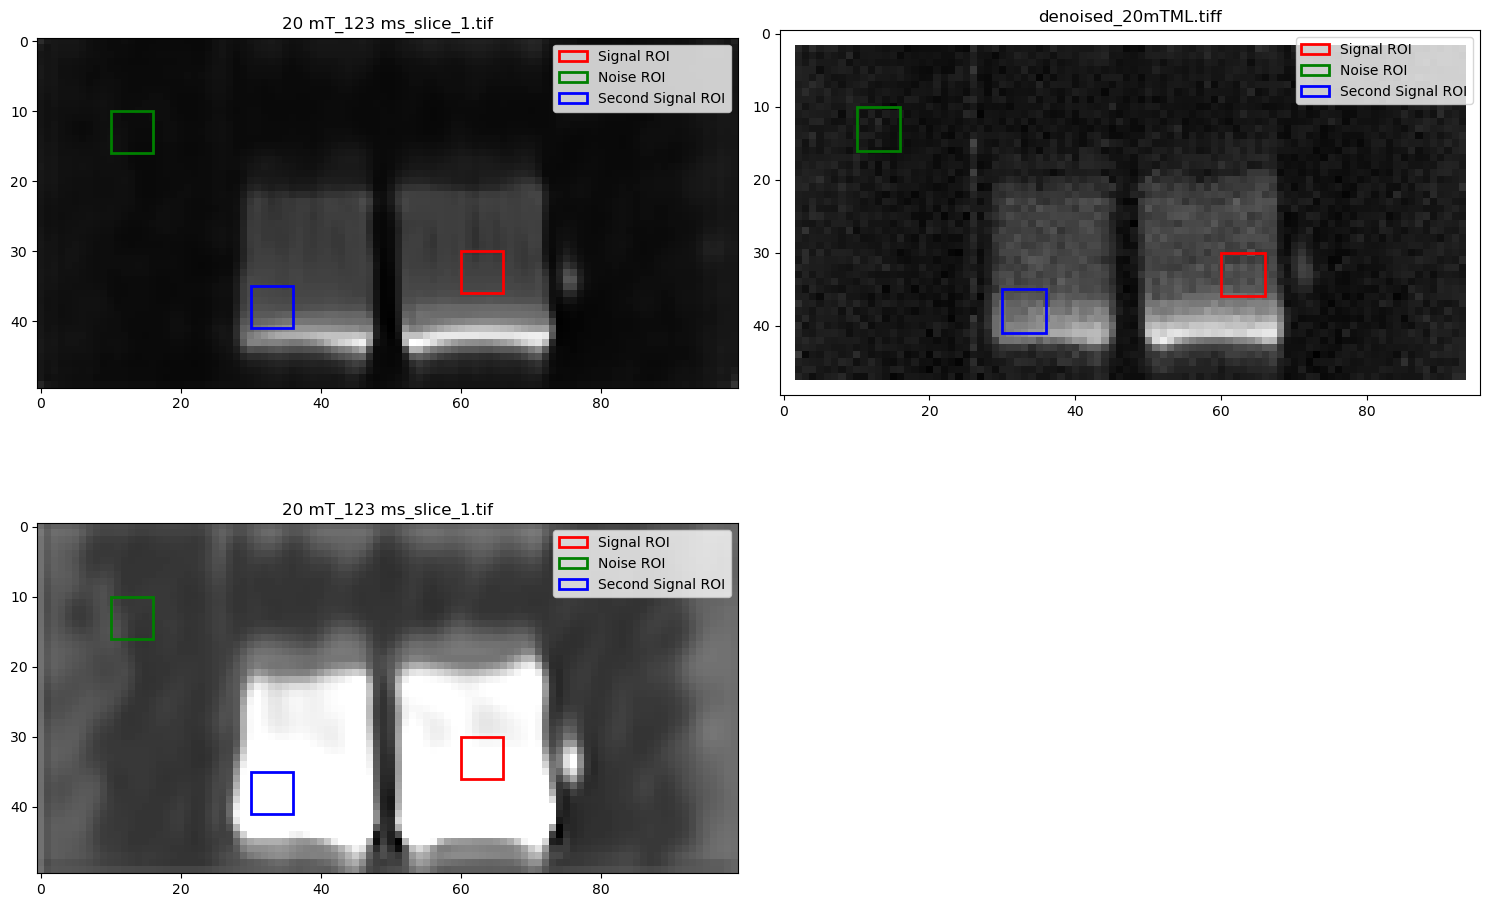

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/20 mT_123 ms_slice_1.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_20mTML.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/20 mT_123 ms_slice_1.tif']
    


roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)



Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/2 mT_131 ms_slice_1.tif
SNR: 84.04009606526029, CNR: -27.878807010541177
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/2mTML.tiff
SNR: 1.2273654686885926, CNR: -0.15082122309060572
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/2 mT_131 ms_slice_1.tif
SNR: 112.3132095336914, CNR: -12.698572158813477


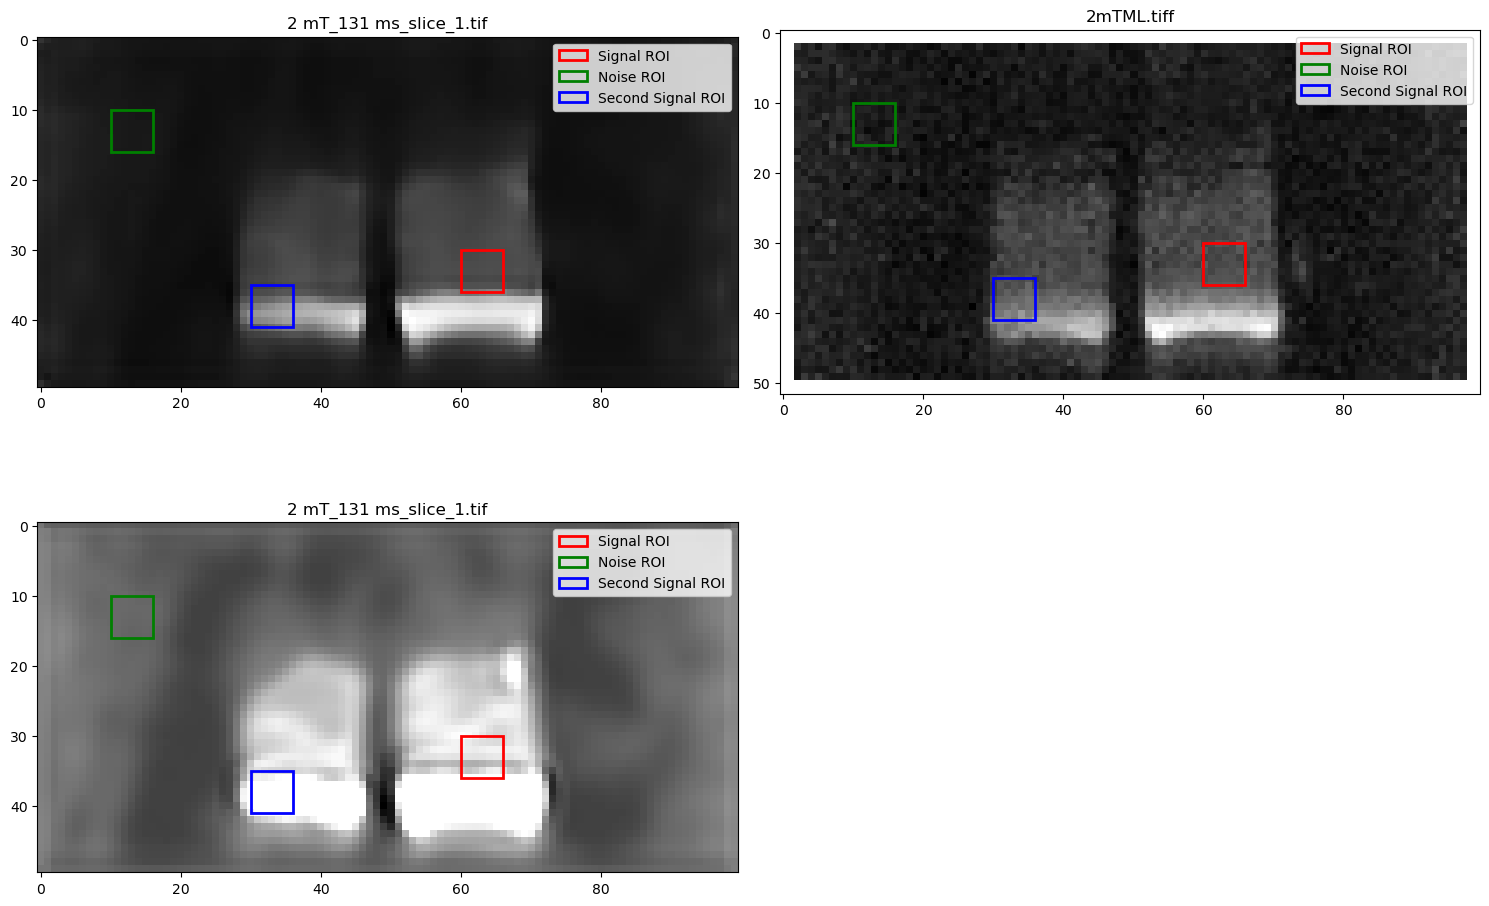

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()



image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/2 mT_131 ms_slice_1.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/2mTML.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/2 mT_131 ms_slice_1.tif']
    

roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)


Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/0 mT_18 ms_slice_1.tif
SNR: 48.949930271495205, CNR: -6.939262145767516
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_ML_0mT.tiff
SNR: 1.2986060931561607, CNR: -0.10439731470061353
Image: ../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/0 mT_18 ms_slice_1.tif
SNR: 27.66221046447754, CNR: -1.0818969011306763


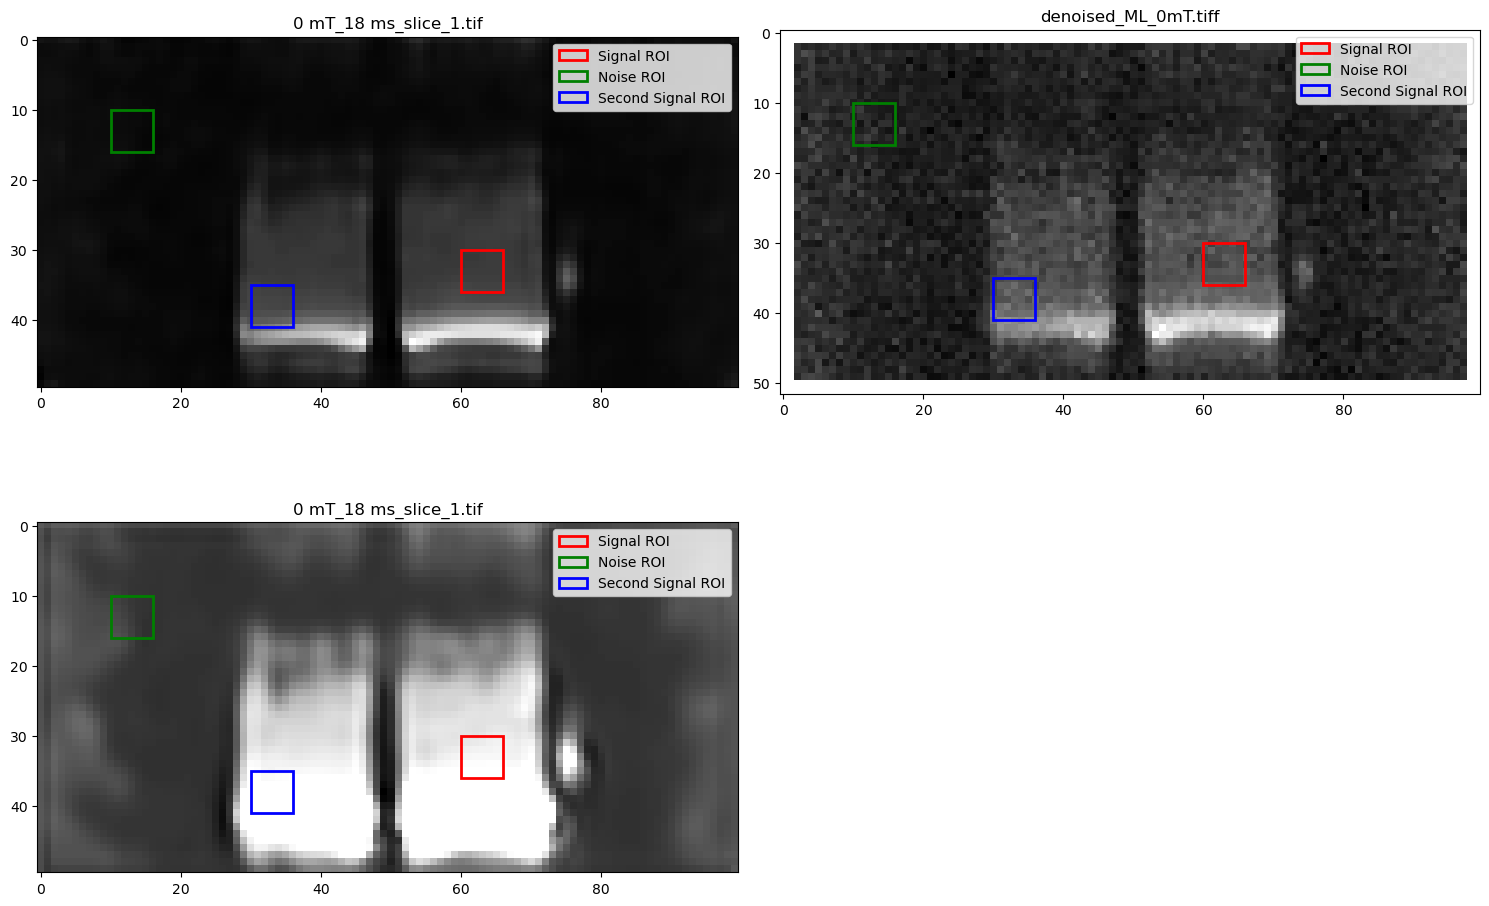

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

   

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()



image_paths = [
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F/0 mT_18 ms_slice_1.tif',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self/denoised_ML_0mT.tiff',
    '../Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self/0 mT_18 ms_slice_1.tif']
    


roi_coords = (60, 30, 6, 6)
noise_coords = (10, 10, 6, 6)
roi2_coords = (30,35, 6, 6)  
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)
